In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load metadata CSV
df = pd.read_csv("Skin_Cancer\train-metadata.csv")

# Generate image path using pandas string operation
df['filename'] = "Skin_Cancer\train-image\image\\" + df['isic_id'] + ".jpg"

# Keras expects target labels to be strings for binary classification
df['target'] = df['target'].astype(str)

# Train-test split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['target'], random_state=42)

# Image generator
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='target',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

val_gen = datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='target',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Load ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_gen, validation_data=val_gen, epochs=5)



Found 20264 validated image filenames belonging to 2 classes.
Found 5067 validated image filenames belonging to 2 classes.


C:\Users\atade\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1545s 2s/step - accuracy: 0.8223 - loss: 0.4678 - val_accuracy: 0.8240 - val_loss: 0.4694
Epoch 2/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1607s 3s/step - accuracy: 0.8245 - loss: 0.4499 - val_accuracy: 0.8244 - val_loss: 0.4663
Epoch 3/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1899s 3s/step - accuracy: 0.8210 - loss: 0.4483 - val_accuracy: 0.8275 - val_loss: 0.4276
Epoch 4/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1865s 3s/step - accuracy: 0.8249 - loss: 0.4405 - val_accuracy: 0.8259 - val_loss: 0.4526
Epoch 5/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1611s 3s/step - accuracy: 0.8272 - loss: 0.4308 - val_accuracy: 0.8269 - val_loss: 0.4266


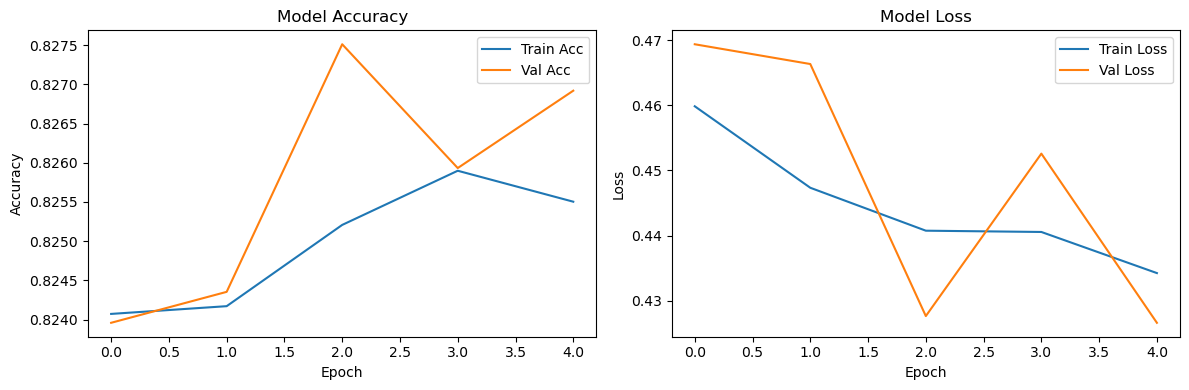

In [4]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
